# 2.1 Perceptron
신경망의 기원이 되는 알고리즘

다수의 신호를 입력 받아 하나의 신호를 출력  
다만 이 신호는 흐름이 있는데, (ex. 전류)  
흐른다/안 흐른다 (1/0) 2가지 값을 가진다.  
- 1 : 신호가 흐른다.
- 0 : 신호가 안 흐른다.

#### 동작 원리

<div>
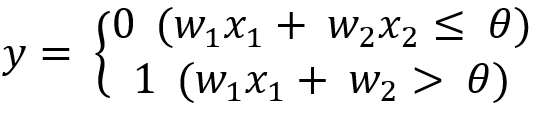
</div>

여기서 w는 가중치, x는 입력 신호, theta는 임계값이다.  

입력 신호가 뉴런에 보내질 때 각각 고유한 가중치가 곱해지는데,  
이 가중치는 각 신호가 결과에 주는 영향력을 조정하는 요소로 작용한다. (클수록 해당 신호가 중요하다.)  
뉴런에서 보내온 신호의 총합이 정해진 한계를 넘어설 때 1을 출력한다. (=뉴런이 활성화한다.)
여기서 이 한계가 임계값이다.

# 2.2 단순한 논리 회로 - AND, OR, NAND

퍼셉트론으로 AND, OR, NAND 등의 논리 회로를 표현할 수 있다.  
중요한 점은, ***퍼셉트론의 구조는 AND, OR, NAND 게이트에서 모두 동일하다***는 점이다.  
가중치와 임계값만 바꿔주면 된다.  

# 2.3 퍼셉트론 구현하기

## 2.3.1 간단한 구현 - AND

In [3]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = w1*x1 + w2*x2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [6]:
AND(0,0), AND(1,0), AND(0,1), AND(1,1)

(0, 0, 0, 1)

## 2.3.2 가중치와 편향 도입
이전의 theta를 -b로 치환한다.  
여기서 b는 편향이다.

In [7]:
import numpy as np
x = np.array([0,1])  # 입력
w = np.array([0.5,0.5])
b = -0.7
w*x

array([0. , 0.5])

In [8]:
np.sum(w*x)

0.5

In [9]:
np.sum(w*x) + b

-0.19999999999999996

## 2.3.3 가중치와 편향 구현하기
모두 같은 구조의 퍼셉트론  
NAND와 OR은 AND와는 w와 b만 다르다.  

### AND 구현

In [10]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5,0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    
    if tmp <= 0:
        return 0
    else:
        return 1

### NAND 구현

In [11]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    
    if tmp <= 0:
        return 0
    else: 
        return 1

### OR 구현

In [12]:
def OR(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    
    if tmp <= 0:
        return 0
    else: 
        return 1

# 2.4 퍼셉트론의 한계
XOR 게이트도 구현이 가능할까?

## 2.4.1 도전! XOR 게이트
### XOR 게이트
배타적 논리합 -> 값이 다를 때만 1  
퍼셉트론으로는 XOR 게이트를 구현할 수 없다.  
입력을((0,0),(1,0),(0,1),(1,1)) 그래프에 그렸을 때, 출력이 0이 나오는 경우와 1이 나오는 경우를 직선 1개로 나눠 구분할 수 없기 때문이다.  
하지만 직선이 아닌 곡선으로는 나눌 수 있다. 그렇게 그려 만든 영역을 ***비선형 영역***이라 하고, 직선으로 나눠 만든 영역을 ***선형 영역***이라 한다.

# 2.5 다층 퍼셉트론이 출동한다면
퍼셉트론의 장점 중 하나로, 여러 층을 쌓아 다층 퍼셉트론을 만들 수 있다.
### XOR 게이트
층을 하나 더 쌓으면 구현 가능하다.

## 2.5.1 기본 게이트 조합하기
AND, NAND, OR를 하나씩 대입하면, 이 세 가지를 연결하여 XOR을 만들 수 있다.

## 2.5.2 XOR 게이트 구현하기

In [15]:
def XOR(x1, x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

In [16]:
XOR(0,0), XOR(1,0), XOR(0,1), XOR(1,1)

(0, 1, 1, 0)

### 다층 구조의 네트워크  
- x1, x2 : 0층  
- s1, s2 : 1층  
- y : 2층  

따라서,  
- AND, OR, NAND : 단층 퍼셉트론
- XOR : 2층 퍼셉트론  
0층 -> 1층, 1층 -> 2층으로 신호가 전달된다. 그리고 2층에서 y를 출력한다.  

다층 퍼셉트론으로 표현하지 못한 것들을 층을 늘려 구현할 수 있고, 복잡한 회로를 만들 수 있다.

# 2.6 NAND에서 컴퓨터까지

# 2.7 정리
### 퍼셉트론
- 입출력을 갖춘 알고리즘 -> 입력을 주면 정해진 규칙에 따른 값을 출력한다.
- 가중치 w와 편향 b를 매개변수로 설정
- AND, OR 게이트 등의 논리 회로 표현 가능
- XOR은 단층이 아닌 2층 퍼셉트론으로 표현 가능
- 단층 퍼셉트론은 직선형 영역만 표현할 수 있고, 다층 퍼셉트론은 비선형 영역도 표현할 ㅜㅅ 있다.
- 다층 퍼셉트론은 (이론상) 컴퓨터를 표현할 수 있다.